In [1]:
from __future__ import division
import time

import numpy as np
import pandas as pd

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

rng = np.random.RandomState(0)

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
df_bos= pd.DataFrame(boston.data)
df_bos.columns = boston.feature_names
df_bos['PRICE'] = boston.target
df_bos.head()
df_bos.to_csv("housing1.csv")

In [3]:
df_temp = pd.read_csv("/home/siddhi/Downloads/housing1.csv")
train = df_temp['LSTAT']
y = df_temp['PRICE']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.2, random_state = 0)

In [5]:
# Fit regression model

svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})

kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                              "gamma": np.logspace(-2, 2, 5)})

t0 = time.time()
svr.fit(X_train.reshape(len(X_train),1), y_train)
svr_fit = time.time() - t0
print("SVR complexity and bandwidth selected and model fitted in %.3f s"
      % svr_fit)

t0 = time.time()
kr.fit(X_train.reshape(len(X_train),1), y_train)
kr_fit = time.time() - t0
print("KRR complexity and bandwidth selected and model fitted in %.3f s"
      % kr_fit)

sv_ratio = svr.best_estimator_.support_.shape[0] / len(X_train)
print("Support vector ratio: %.3f" % sv_ratio)

t0 = time.time()
y_svr = svr.predict(X_train.reshape(len(X_train),1))
svr_predict = time.time() - t0
print("SVR prediction for %d inputs in %.3f s"
      % (X_train.shape[0], svr_predict))

t0 = time.time()
y_kr = kr.predict(X_train.reshape(len(X_train),1))
kr_predict = time.time() - t0
print("KRR prediction for %d inputs in %.3f s"
      % (X_train.shape[0], kr_predict))

/Applications/Anaconda/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if sys.path[0] == '':


SVR complexity and bandwidth selected and model fitted in 1.869 s


/Applications/Anaconda/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


KRR complexity and bandwidth selected and model fitted in 0.907 s
Support vector ratio: 0.983
SVR prediction for 404 inputs in 0.004 s
KRR prediction for 404 inputs in 0.003 s


/Applications/Anaconda/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:27: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Applications/Anaconda/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:33: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [6]:
# Look at the results
sv_ind = svr.best_estimator_.support_
plt.scatter(X_train[sv_ind], y_train[sv_ind], c='r', s=50, label='SVR support vectors',
            zorder=2, edgecolors=(0, 0, 0))
plt.scatter(X_train[:100], y_train[:100], c='k', label='data', zorder=1,
            edgecolors=(0, 0, 0))
plt.plot(X_train, y_svr, c='r',
         label='SVR (fit: %.3fs, predict: %.3fs)' % (svr_fit, svr_predict))
plt.plot(X_train, y_kr, c='g',
         label='KRR (fit: %.3fs, predict: %.3fs)' % (kr_fit, kr_predict))
plt.xlabel('data')
plt.ylabel('target')
plt.title('SVR versus Kernel Ridge')
plt.legend()

In [7]:
# Visualize training and prediction time
plt.figure()

In [8]:
# Generate sample data
# X = 5 * rng.rand(10000, 1)
# y = np.sin(X).ravel()
# y[::5] += 3 * (0.5 - rng.rand(X.shape[0] // 5))
sizes = np.logspace(1, 4, 7, dtype=np.int)
for name, estimator in {"KRR": KernelRidge(kernel='rbf', alpha=0.1,
                                           gamma=10),
                        "SVR": SVR(kernel='rbf', C=1e1, gamma=10)}.items():
    train_time = []
    test_time = []
    for train_test_size in sizes:
        t0 = time.time()
        estimator.fit(X_train.reshape(len(X_train),1), y_train)
        train_time.append(time.time() - t0)

        t0 = time.time()
        estimator.predict(X_train.reshape(len(X_train),1))
        test_time.append(time.time() - t0)

    plt.plot(sizes, train_time, 'o-', color="r" if name == "SVR" else "g",
             label="%s (train)" % name)
    plt.plot(sizes, test_time, 'o--', color="r" if name == "SVR" else "g",
             label="%s (test)" % name)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Train size")
plt.ylabel("Time (seconds)")
plt.title('Execution Time')
plt.legend(loc="best")

/Applications/Anaconda/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  del sys.path[0]
/Applications/Anaconda/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


/Applications/Anaconda/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/Applications/Anaconda/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


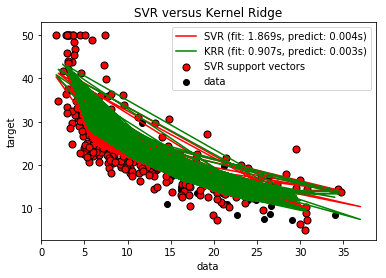

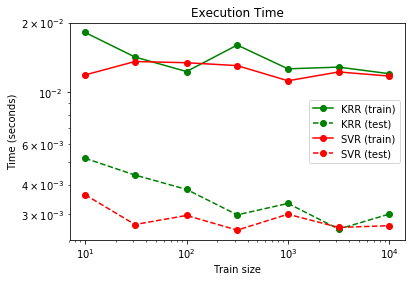

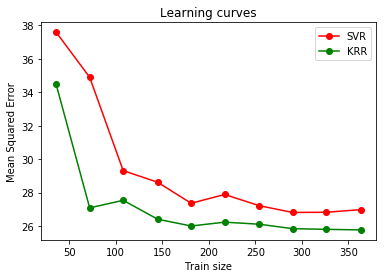

In [9]:
# Visualize learning curves
plt.figure()

svr = SVR(kernel='rbf', C=1e1, gamma=0.1)
kr = KernelRidge(kernel='rbf', alpha=0.1, gamma=0.1)
train_sizes, train_scores_svr, test_scores_svr = \
    learning_curve(svr, X_train.reshape(len(X_train),1), y_train, train_sizes=np.linspace(0.1, 1, 10),
                   scoring="neg_mean_squared_error", cv=10)
train_sizes_abs, train_scores_kr, test_scores_kr = \
    learning_curve(kr, X_train.reshape(len(X_train),1), y_train, train_sizes=np.linspace(0.1, 1, 10),
                   scoring="neg_mean_squared_error", cv=10)

plt.plot(train_sizes, -test_scores_svr.mean(1), 'o-', color="r",
         label="SVR")
plt.plot(train_sizes, -test_scores_kr.mean(1), 'o-', color="g",
         label="KRR")
plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title('Learning curves')
plt.legend(loc="best")

plt.show()